In [52]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [53]:
all_mut_df = pd.read_pickle('./out_assoc_gen_feats.pkl')
len(all_mut_df)

7670

In [54]:
# Get unique entries from the condition columns
cond_cols = [
    'media_description', 'carbon_source',
    'nitrogen_source', 'phosphorous_source', 'sulfur_source',
    'calcium_source', 'supplement', 'temperature', 'strain',
    'strain_details']
uniq_conds = set()
for c in cond_cols:
    uniq_conds.update(all_mut_df[c].unique())
len(uniq_conds)

72

Preprocessing mutation set for shorter for loop runtime

In [55]:
ros_exp_mut_df = all_mut_df[
    (all_mut_df.supplement.isin(['paraquat','PQ(0.8mM)']))
    | (all_mut_df.tech_rep_description=='20uM FeSO4 and 10mM sodium citrate')
]
len(ros_exp_mut_df)

351

In [56]:
ros_conds = {'paraquat','PQ(0.8mM)','20uM FeSO4 and 10mM sodium citrate'}


ros_assoc_mut_df = pd.DataFrame()
for _, m in ros_exp_mut_df.iterrows():
    for f in m['genetic features']:
        if len(ros_conds & f['significantly associated conditions']) > 0:
            ros_assoc_mut_df = pd.concat([
                ros_assoc_mut_df,
                m
            ], axis=1)
            break

ros_assoc_mut_df = ros_assoc_mut_df.T
ros_assoc_mut_df

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,ALEdb source,sample,coding,exp ALE,range,gene RegulonDB ID,genetic features,afir,media_description,carbon_source,nitrogen_source,phosphorous_source,sulfur_source,calcium_source,supplement,temperature,strain,strain_details,taxonomy_id,tech_rep_description
2925,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,17 45 1 1,True,Iron-ALE 17,"(4159126, 4159126)",{ECK120000674},"[{'name': 'oxyR', 'RegulonDB ID': 'ECK12000067...",A17 F45 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2926,Iron-ALE,18,39,1,1,1.0,2067837,SNP,G→T,pseudogene (56/435 nt),yoeG,NC_000913,public,18 39 1 1,False,Iron-ALE 18,"(2067837, 2067837)",{ECK125240970},"[{'name': 'yoeG', 'RegulonDB ID': 'ECK12524097...",A18 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2927,Iron-ALE,18,39,1,1,1.0,3815859,DEL,Δ82 bp,,rph,NC_000913,public,18 39 1 1,True,Iron-ALE 18,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",A18 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2928,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,18 39 1 1,True,Iron-ALE 18,"(4159112, 4159112)",{ECK120000674},"[{'name': 'oxyR', 'RegulonDB ID': 'ECK12000067...",A18 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2929,Iron-ALE,19,39,1,1,1.0,331806,SNP,G→A,intergenic (+310/‑565),"betT, yahA",NC_000913,public,19 39 1 1,False,Iron-ALE 19,"(331806, 331806)",{},"[{'RegulonDB ID': 'ECK120000108/ECK120001214',...",A19 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,ROS_eAMP,29,18,0,1,1.0,3041634,SNP,A→C,T108P (ACC→CCC),ygfZ,NC_000913,public,29 18 0 1,True,ROS_eAMP 29,"(3041634, 3041634)",{ECK120004073},"[{'name': 'ygfZ', 'RegulonDB ID': 'ECK12000407...",A29 F18 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,
3774,ROS_eAMP,29,71,0,1,1.0,3473615,SNP,C→T,W156* (TGG→TAG),rpsG,NC_000913,public,29 71 0 1,True,ROS_eAMP 29,"(3473615, 3473615)",{ECK120000897},"[{'name': 'rpsG', 'RegulonDB ID': 'ECK12000089...",A29 F71 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,
3776,ROS_eAMP,29,18,0,1,1.0,3815859,DEL,Δ82 bp,,[rph],NC_000913,public,29 18 0 1,True,ROS_eAMP 29,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",A29 F18 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,
3777,ROS_eAMP,29,119,0,1,1.0,4033595,SNP,C→A,P151T (CCT→ACT),trkH,NC_000913,public,29 119 0 1,True,ROS_eAMP 29,"(4033595, 4033595)",{ECK120001010},"[{'name': 'trkH', 'RegulonDB ID': 'ECK12000101...",A29 F119 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,


In [57]:
# Getting the mutated genetic feature names statistaically associated with ROS conditions
mut_gen_cond_assoc_df = pd.read_csv("./data/mut_gen_cond_assocs.csv")

assoc_gen_feat_df = mut_gen_cond_assoc_df[
    (mut_gen_cond_assoc_df['condition'].isin(ros_conds))
    & (mut_gen_cond_assoc_df['p value'] < 0.01)
]
assoc_gen_feat_df.head()

,mutated features,condition,odd ratio,p value
1854,aceE,paraquat,26.425456,2.569582e-20
3150,acs/nrfA,paraquat,29.630561,2.487864e-03
7848,arcB,paraquat,16.376203,1.397158e-04
9063,arnA,paraquat,29.938416,1.068421e-07
9387,aroC/prmB,paraquat,29.630561,2.487864e-03


In [58]:
import numpy as np


# assoc_mat_df = pd.DataFrame(0, columns=ros_assoc_gen_feat_cnt_d.keys(), index=set(assoc_gen_feat_df['condition']))
assoc_mat_df = pd.DataFrame(0, columns=assoc_gen_feat_df['mutated features'].unique(), index=set(assoc_gen_feat_df['condition']))
for cond, row in assoc_mat_df.iterrows():
    for feat in row.index:
        df = mut_gen_cond_assoc_df[
            (mut_gen_cond_assoc_df['condition']==cond)
            & (mut_gen_cond_assoc_df['mutated features']==feat)
        ]
        odds_ratio = df.iloc[0]['odd ratio']  # assuming only ever 1 row with iloc usage
        log_odds_ratio = 0
        if odds_ratio != 0:
            log_odds_ratio = np.log10(odds_ratio)
        assoc_mat_df.at[cond, feat] = log_odds_ratio

assoc_mat_df

,aceE,acs/nrfA,arcB,arnA,aroC/prmB,aroG,bdcA,betT/pdeL,brnQ,fur,glnX,gltA,gltT/rrlB,gspD,hns/tdk,icd,iscR,lon,mepM,nuoG,nuoM,oxyR,pitA,pncA,pyrE/rph,renD/emrE,rph,rpoB,rpsG,sdhA,sucA,thiC/rsd,trkH,ydbK/ydbJ,ydcC,yegK,ygfZ,yheS,yoeG,zwf
paraquat,1.422022,1.47174,1.214213,1.476229,1.47174,1.47174,0.000000,0.000000,1.282641,1.476229,1.440802,1.329425,1.47174,0.000000,0.919407,1.012751,1.181716,1.153473,1.15132,1.472857,1.472857,0.466263,1.480768,1.47174,0.331122,1.476229,0.684143,0.600685,1.009923,1.15132,1.252644,1.477359,1.100185,1.15132,0.000000,0.000000,1.49117,0.000000,0.000000,1.111406
20uM FeSO4 and 10mM sodium citrate,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,2.817792,2.497414,0.000000,0.000000,0.000000,0.000000,0.00000,2.497414,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.795433,0.000000,0.00000,0.958160,0.000000,1.308358,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.088163,2.817792,0.00000,2.497414,2.844082,0.000000


In [59]:
assoc_mat_df.rename(index={'20uM FeSO4 and 10mM sodium citrate':'FeSO4'}, inplace=True)
assoc_mat_df

,aceE,acs/nrfA,arcB,arnA,aroC/prmB,aroG,bdcA,betT/pdeL,brnQ,fur,glnX,gltA,gltT/rrlB,gspD,hns/tdk,icd,iscR,lon,mepM,nuoG,nuoM,oxyR,pitA,pncA,pyrE/rph,renD/emrE,rph,rpoB,rpsG,sdhA,sucA,thiC/rsd,trkH,ydbK/ydbJ,ydcC,yegK,ygfZ,yheS,yoeG,zwf
paraquat,1.422022,1.47174,1.214213,1.476229,1.47174,1.47174,0.000000,0.000000,1.282641,1.476229,1.440802,1.329425,1.47174,0.000000,0.919407,1.012751,1.181716,1.153473,1.15132,1.472857,1.472857,0.466263,1.480768,1.47174,0.331122,1.476229,0.684143,0.600685,1.009923,1.15132,1.252644,1.477359,1.100185,1.15132,0.000000,0.000000,1.49117,0.000000,0.000000,1.111406
FeSO4,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,2.817792,2.497414,0.000000,0.000000,0.000000,0.000000,0.00000,2.497414,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.795433,0.000000,0.00000,0.958160,0.000000,1.308358,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.088163,2.817792,0.00000,2.497414,2.844082,0.000000


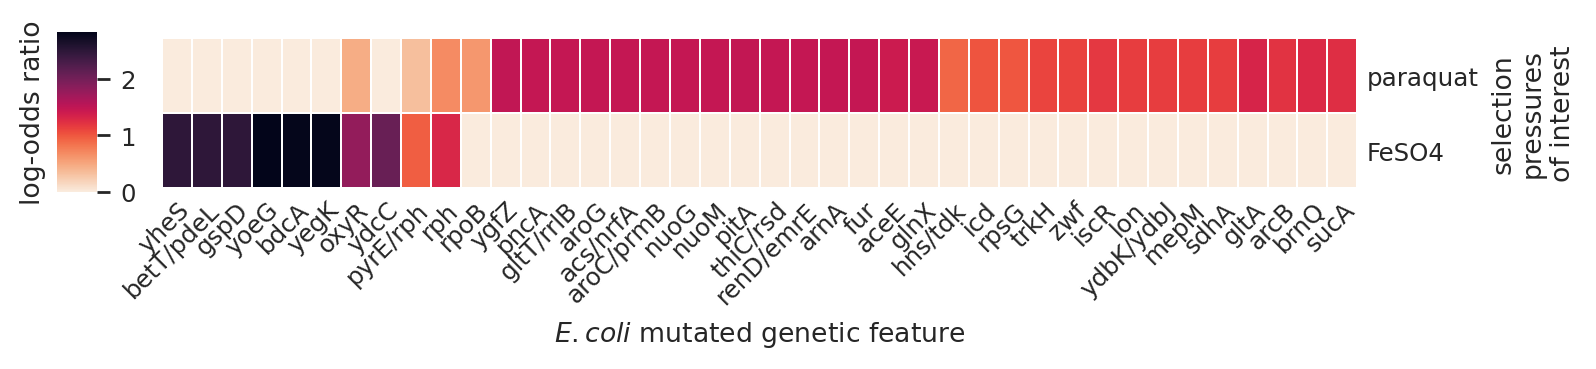

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("white")

cm = sns.clustermap(
    assoc_mat_df,
    cmap="rocket_r", linewidth=0.1,

    figsize=(8,2),
    cbar_kws={'label': 'log-odds ratio'},
    xticklabels=1
)
cm.ax_heatmap.tick_params(axis='y', which='both', length=0, rotation=0)
cm.ax_heatmap.tick_params(axis='x', which='both', length=0,
)
plt.setp(cm.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cm.ax_heatmap.set_xlabel('$\it{E. coli}$ mutated genetic feature')
cm.ax_heatmap.set_ylabel('selection\npressures\nof interest')

cm.ax_col_dendrogram.set_visible(False)
cm.ax_row_dendrogram.set_visible(False)

cm.ax_cbar.set_position((0.14, 0.45, 0.025, 0.4))
cm.ax_cbar.yaxis.set_label_position('left')
plt.savefig("f2a.svg")
plt.show()

In [61]:
summary_df = assoc_mat_df.copy().T

# rename column '20uM FeSO4 and 10mM sodium citrate' to 'FeSO4'
summary_df.rename(columns={'FeSO4':'FeSO4 log-odds ratio'}, inplace=True)
summary_df.rename(columns={'paraquat':'paraquat log-odds ratio'}, inplace=True)

summary_df

,paraquat log-odds ratio,FeSO4 log-odds ratio
aceE,1.422022,0.000000
acs/nrfA,1.471740,0.000000
arcB,1.214213,0.000000
arnA,1.476229,0.000000
aroC/prmB,1.471740,0.000000
aroG,1.471740,0.000000
bdcA,0.000000,2.817792
betT/pdeL,0.000000,2.497414
brnQ,1.282641,0.000000
fur,1.476229,0.000000


In [62]:
ros_assoc_gen_feat_cnt_d = dict()
for _, m in ros_assoc_mut_df.iterrows():
    for f in m['genetic features']:
        if f['name'] in set(assoc_gen_feat_df['mutated features']):
            if f['name'] not in ros_assoc_gen_feat_cnt_d.keys():
                ros_assoc_gen_feat_cnt_d[f['name']] = 0
            ros_assoc_gen_feat_cnt_d[f['name']] += 1

# The counts are just to see how many times a feature associated with the ROS has a mutation across the all ALE experiments
ros_assoc_gen_feat_cnt_df = pd.DataFrame(list(ros_assoc_gen_feat_cnt_d.items()), columns = ['target','sum']).set_index('target')

In [63]:
# ros_assoc_gen_feat_cnt_df
summary_df = summary_df.join(ros_assoc_gen_feat_cnt_df)
summary_df = summary_df.rename(columns={'sum':'ALE-unique mutation count'})
summary_df

,paraquat log-odds ratio,FeSO4 log-odds ratio,ALE-unique mutation count
aceE,1.422022,0.000000,19
acs/nrfA,1.471740,0.000000,2
arcB,1.214213,0.000000,4
arnA,1.476229,0.000000,6
aroC/prmB,1.471740,0.000000,2
aroG,1.471740,0.000000,2
bdcA,0.000000,2.817792,1
betT/pdeL,0.000000,2.497414,1
brnQ,1.282641,0.000000,2
fur,1.476229,0.000000,6


In [64]:
s = set(assoc_mat_df.columns)
d = dict()
for _, m in ros_assoc_mut_df.iterrows():
    for f in m['genetic features']:
        if f['name'] in s:
            if f['name'] not in d.keys():
                d[f['name']] = set()
            conds = f['significantly associated conditions']
            conds.discard('')
            d[f['name']].update(f['significantly associated conditions'])

d2 = dict()
for k, v in d.items():
    d2[k] = len(v)

summary_df['total significantly associated condition count'] = [d2.get(f, 0) for f in summary_df.index]
summary_df

,paraquat log-odds ratio,FeSO4 log-odds ratio,ALE-unique mutation count,total significantly associated condition count
aceE,1.422022,0.000000,19,7
acs/nrfA,1.471740,0.000000,2,2
arcB,1.214213,0.000000,4,2
arnA,1.476229,0.000000,6,4
aroC/prmB,1.471740,0.000000,2,2
aroG,1.471740,0.000000,2,2
bdcA,0.000000,2.817792,1,3
betT/pdeL,0.000000,2.497414,1,3
brnQ,1.282641,0.000000,2,2
fur,1.476229,0.000000,6,4


In [65]:
all_mut_df

s = set(assoc_mat_df.columns)
d = dict()
for _, m in all_mut_df.iterrows():
    for f in m['genetic features']:
        if f['name'] in s:
            if f['name'] not in d.keys():
                d[f['name']] = set()
            d[f['name']].add(m['exp'])
d2 = dict()
for k, v in d.items():
    d2[k] = len(v)

summary_df['total ALE experiment count'] = [d2.get(f, 0) for f in summary_df.index]
summary_df

,paraquat log-odds ratio,FeSO4 log-odds ratio,ALE-unique mutation count,total significantly associated condition count,total ALE experiment count
aceE,1.422022,0.000000,19,7,2
acs/nrfA,1.471740,0.000000,2,2,1
arcB,1.214213,0.000000,4,2,4
arnA,1.476229,0.000000,6,4,1
aroC/prmB,1.471740,0.000000,2,2,1
aroG,1.471740,0.000000,2,2,1
bdcA,0.000000,2.817792,1,3,1
betT/pdeL,0.000000,2.497414,1,3,2
brnQ,1.282641,0.000000,2,2,2
fur,1.476229,0.000000,6,4,1


In [66]:
assoc_gen_feat_df_2 = assoc_gen_feat_df.copy()
assoc_gen_feat_df_2['condition'] = assoc_gen_feat_df_2['condition'].replace('20uM FeSO4 and 10mM sodium citrate', 'FeSO4')
assoc_gen_feat_df_2.head()

,mutated features,condition,odd ratio,p value
1854,aceE,paraquat,26.425456,2.569582e-20
3150,acs/nrfA,paraquat,29.630561,2.487864e-03
7848,arcB,paraquat,16.376203,1.397158e-04
9063,arnA,paraquat,29.938416,1.068421e-07
9387,aroC/prmB,paraquat,29.630561,2.487864e-03


In [67]:
summary_df['FeSO4 p value'] = 0
summary_df['paraquat p value'] = 0

for _, row in assoc_gen_feat_df_2.iterrows():
    summary_df.at[row['mutated features'], f"{row['condition']} p value"] = row['p value']

summary_df

,paraquat log-odds ratio,FeSO4 log-odds ratio,ALE-unique mutation count,total significantly associated condition count,total ALE experiment count,FeSO4 p value,paraquat p value
aceE,1.422022,0.000000,19,7,2,0.000000,2.569582e-20
acs/nrfA,1.471740,0.000000,2,2,1,0.000000,2.487864e-03
arcB,1.214213,0.000000,4,2,4,0.000000,1.397158e-04
arnA,1.476229,0.000000,6,4,1,0.000000,1.068421e-07
aroC/prmB,1.471740,0.000000,2,2,1,0.000000,2.487864e-03
aroG,1.471740,0.000000,2,2,1,0.000000,2.487864e-03
bdcA,0.000000,2.817792,1,3,1,0.001755,0.000000e+00
betT/pdeL,0.000000,2.497414,1,3,2,0.003508,0.000000e+00
brnQ,1.282641,0.000000,2,2,2,0.000000,5.542370e-03
fur,1.476229,0.000000,6,4,1,0.000000,1.068421e-07


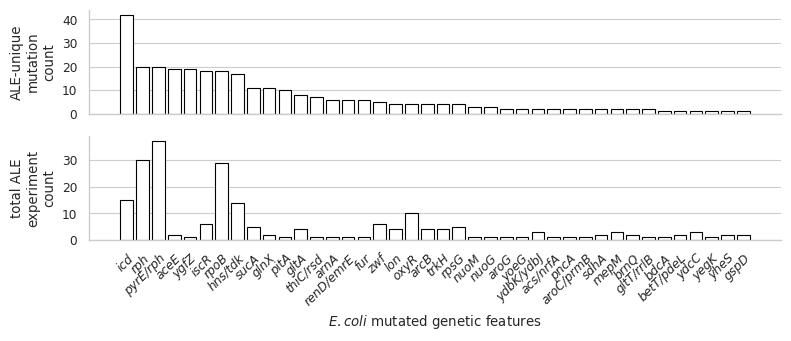

In [76]:
sns.set_context("paper")
sns.set_style("whitegrid")
import matplotlib.ticker as ticker
plt.rcParams["figure.dpi"] = 100


sorted_data = summary_df.sort_values(by="ALE-unique mutation count", ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(8, 3.5), sharex=True)

axs[0].bar(sorted_data.index, sorted_data['ALE-unique mutation count'], color='white', edgecolor='black')
axs[0].set_ylabel('ALE-unique\nmutation\ncount')
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(10))
axs[0].xaxis.grid(False)

axs[1].bar(sorted_data.index, sorted_data['total ALE experiment count'], color='white', edgecolor='black')
axs[1].set_xlabel('$\it{E. coli}$ mutated genetic features')
axs[1].set_ylabel('total ALE\nexperiment\ncount')
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(10))
axs[1].xaxis.grid(False)

sns.despine(right=True, top=True)

plt.xticks(fontstyle='italic', rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()

plt.savefig("f2b.svg")